In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split
import warnings
sys.path.append("../")

from src.nnsrc.dense import NeuralNetwork

warnings.filterwarnings('ignore')

In [12]:
# data not in repo because of size

In [13]:
train_file = '../src/data/mnist/train.csv'
test_file = '../src/data/mnist/test.csv'

In [16]:
train_data = pd.read_csv(train_file)

In [17]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_X = train_data.drop('label', axis=1).values
train_Y = train_data['label'].values.reshape(-1,1)

In [56]:
train_X = train_X/255

In [57]:
np.max(train_X)

1.0

In [58]:
train_Y = np.reshape(train_Y, (train_Y.shape[0],))
train_Y.shape

(42000,)

In [59]:
nn = NeuralNetwork(n_layers=5, n_neurons_per_layer=[784, 50, 30, 20, 10], act_funcs=['sigmoid', 'relu', 'relu', 'relu', 'softmax'],
                   bias=True, problem='classification', error_function='cross_entropy')
print("Shape of NN:")
for layer in nn.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 784 784
Dense_1 784 50
Dense_2 50 30
Dense_3 30 20
Dense_4 20 10


In [62]:
nn.train(train_X.T, train_Y, epochs=50, batch_size=32, alpha=0.7)

{'cost': [96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226114939,
  96809.2226

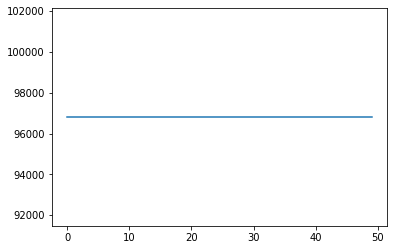

In [63]:
plt.plot(list(range(len(nn.history['cost']))), nn.history['cost'])

In [40]:
test_data = pd.read_csv(test_file)

In [41]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
test_X = test_data.values


In [43]:
predictions = nn.predict(test_X.T)

In [44]:
predictions

array([[0.10414515, 0.10414515, 0.10414515, ..., 0.10414515, 0.10414515,
        0.10414515],
       [0.11114153, 0.11114153, 0.11114153, ..., 0.11114153, 0.11114153,
        0.11114153],
       [0.09507708, 0.09507708, 0.09507708, ..., 0.09507708, 0.09507708,
        0.09507708],
       ...,
       [0.10249781, 0.10249781, 0.10249781, ..., 0.10249781, 0.10249781,
        0.10249781],
       [0.09561688, 0.09561688, 0.09561688, ..., 0.09561688, 0.09561688,
        0.09561688],
       [0.09994252, 0.09994252, 0.09994252, ..., 0.09994252, 0.09994252,
        0.09994252]])

In [45]:
np.save('../src/data/mnist/predictions.npy', predictions)
np.save('../src/data/mnist/predictions_labels.npy', nn.softmax_to_label(predictions))